In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('smoking.csv')
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [3]:
# Removing unecessary columns
df = df.drop(['ID', 'oral'], axis=1)

In [4]:
# Replacing Y and N for 1 and 0 for tartar
df['tartar'] = df['tartar'].replace({'Y': 1, 'N': 0}).astype(int)

/var/folders/zj/r7680p2d20qfmg5r43960xyr0000gn/T/ipykernel_85503/1084404480.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['tartar'] = df['tartar'].replace({'Y': 1, 'N': 0}).astype(int)


In [5]:
# Replacing F and M for 1 and 0 for Gender
df['gender'] = df['gender'].replace({'F': 1, 'M': 0}).astype(int)

df

/var/folders/zj/r7680p2d20qfmg5r43960xyr0000gn/T/ipykernel_85503/3779302731.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({'F': 1, 'M': 0}).astype(int)


,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,1,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,1,0
1,1,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,1,0
2,0,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,0,1
3,0,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,1,0
4,1,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,1,40,170,65,75.0,0.9,0.9,1.0,1.0,110.0,...,118.0,12.3,1.0,0.6,14.0,7.0,10.0,1,1,0
55688,1,45,160,50,70.0,1.2,1.2,1.0,1.0,101.0,...,79.0,14.0,1.0,0.9,20.0,12.0,14.0,0,1,0
55689,1,55,160,50,68.5,1.0,1.2,1.0,1.0,117.0,...,63.0,12.4,1.0,0.5,17.0,11.0,12.0,0,0,0
55690,0,60,165,60,78.0,0.8,1.0,1.0,1.0,133.0,...,146.0,14.4,1.0,0.7,20.0,19.0,18.0,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  int64  
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  float64
 8   hearing(right)       55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting blood sugar  55692 non-null  float64
 12  Cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  HDL                  55692 non-null  float64
 15  LDL                  55692 non-null 

In [7]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
tartar                 0
smoking                0
dtype: int64


In [8]:
df.describe()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,...,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,0.364343,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,...,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.555556,0.367288
std,0.481250,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,...,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.496908,0.482070
min,0.000000,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,...,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,...,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000,0.000000
50%,0.000000,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,1.000000,0.000000
75%,1.000000,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000,1.000000
max,1.000000,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,...,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000,1.000000


In [9]:
# Mark all occurrences of duplicates (including the first one)
duplicates = df[df.duplicated(keep=False)]

# Print or inspect the duplicates
print(duplicates)

       gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
3           0   40         165          70       88.0             1.5   
6           0   40         160          60       85.5             1.0   
7           0   45         165          90       96.0             1.2   
12          0   35         170          70       81.0             1.5   
15          1   40         170          55       68.0             1.0   
...       ...  ...         ...         ...        ...             ...   
55687       1   40         170          65       75.0             0.9   
55688       1   45         160          50       70.0             1.2   
55689       1   55         160          50       68.5             1.0   
55690       0   60         165          60       78.0             0.8   
55691       0   55         160          65       85.0             0.9   

       eyesight(right)  hearing(left)  hearing(right)  systolic  ...    LDL  \
3                  1.5            1.0       

In [10]:
# Removing duplicates - 55692 to 44552
df = df.drop_duplicates()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44552 entries, 0 to 44552
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               44552 non-null  int64  
 1   age                  44552 non-null  int64  
 2   height(cm)           44552 non-null  int64  
 3   weight(kg)           44552 non-null  int64  
 4   waist(cm)            44552 non-null  float64
 5   eyesight(left)       44552 non-null  float64
 6   eyesight(right)      44552 non-null  float64
 7   hearing(left)        44552 non-null  float64
 8   hearing(right)       44552 non-null  float64
 9   systolic             44552 non-null  float64
 10  relaxation           44552 non-null  float64
 11  fasting blood sugar  44552 non-null  float64
 12  Cholesterol          44552 non-null  float64
 13  triglyceride         44552 non-null  float64
 14  HDL                  44552 non-null  float64
 15  LDL                  44552 non-null  floa

In [11]:
df.columns

Index(['gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'tartar',
       'smoking'],
      dtype='object')

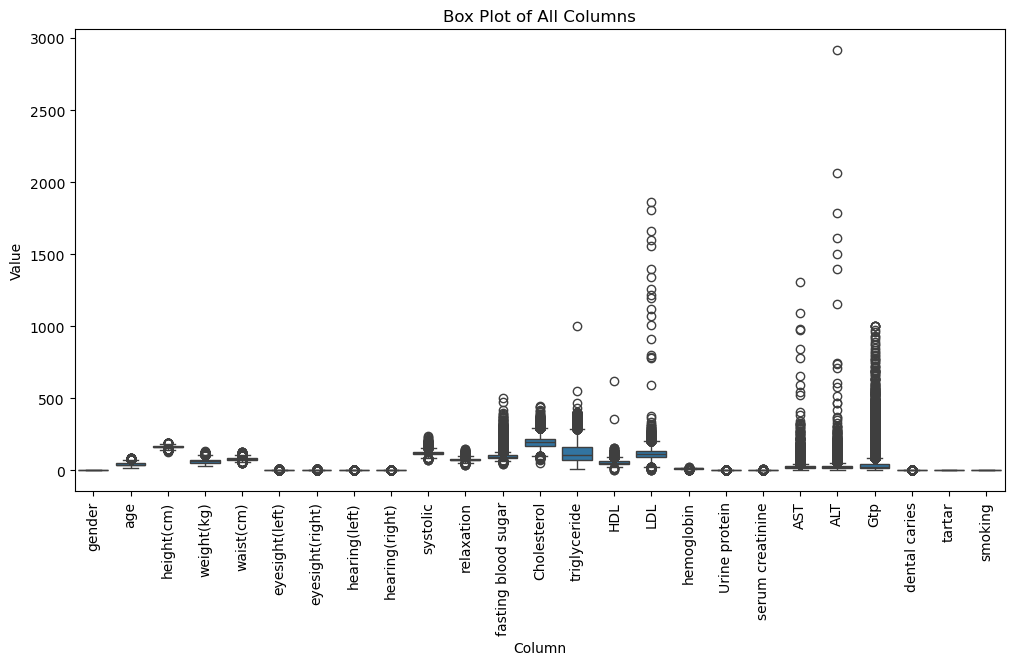

In [12]:
# Melt the DataFrame to long format
df_melted = df.melt(var_name='Column', value_name='Value')

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Column', y='Value', data=df_melted)
plt.xticks(rotation=90)
plt.title('Box Plot of All Columns')
plt.show()

In [13]:
df[df['ALT'] > 1000]

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
5682,1,55,145,40,73.0,1.2,1.0,2.0,1.0,100.0,...,66.0,15.1,1.0,1.0,1311.0,2062.0,103.0,0,1,0
6776,0,50,175,70,83.5,0.8,1.5,1.0,1.0,102.0,...,56.0,14.2,1.0,1.2,841.0,1783.0,140.0,0,1,1
11011,0,35,170,75,93.0,1.0,0.9,1.0,1.0,120.0,...,79.0,14.8,3.0,0.9,250.0,1612.0,138.0,1,1,0
11125,1,45,155,65,86.0,0.9,0.9,1.0,1.0,110.0,...,112.0,13.7,3.0,0.6,1090.0,1400.0,276.0,0,0,0
14615,0,35,170,65,86.0,1.0,1.0,1.0,1.0,124.0,...,59.0,17.2,1.0,0.9,981.0,1155.0,355.0,1,0,1
15496,1,55,155,55,74.0,1.0,1.0,1.0,1.0,110.0,...,179.0,13.2,1.0,0.9,545.0,1504.0,404.0,0,0,0
29543,0,60,170,70,91.5,1.2,1.2,2.0,2.0,117.0,...,77.0,14.1,1.0,1.4,31.0,2914.0,2.0,0,1,0


In [14]:
# Doing some research, we understood that ALT range is 4 to 36 and occasionally can reach 1000. So we identified and deleted 7 rows that are above 1000.
df = df[df['ALT'] <= 1000]

In [15]:
df[df['LDL'] > 500]

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
4623,0,55,160,70,90.3,1.0,1.0,1.0,1.0,123.0,...,790.0,15.8,1.0,0.9,24.0,33.0,29.0,0,1,1
6329,0,40,165,60,82.4,0.5,0.5,1.0,1.0,109.0,...,910.0,15.3,1.0,1.0,32.0,70.0,43.0,0,0,1
9646,0,45,170,65,82.8,1.2,1.2,1.0,1.0,138.0,...,1340.0,17.2,1.0,1.2,16.0,15.0,20.0,0,1,0
11736,0,50,175,70,83.1,0.9,0.9,1.0,1.0,110.0,...,1010.0,16.4,1.0,0.9,19.0,21.0,27.0,0,0,0
17085,0,35,175,80,94.1,1.0,0.9,1.0,1.0,134.0,...,1600.0,15.1,1.0,1.1,38.0,65.0,147.0,1,0,1
20452,1,40,150,50,77.2,1.0,0.9,1.0,1.0,128.0,...,1560.0,14.3,1.0,0.8,17.0,19.0,25.0,1,1,0
22270,0,40,170,70,85.4,0.6,0.4,1.0,1.0,105.0,...,1400.0,16.1,1.0,1.2,19.0,16.0,63.0,0,1,1
22709,0,55,160,50,69.8,0.7,0.7,1.0,1.0,94.0,...,1860.0,14.3,1.0,1.1,20.0,15.0,19.0,1,1,1
22894,1,55,150,45,73.7,1.2,1.2,1.0,1.0,118.0,...,1660.0,14.7,1.0,0.7,22.0,13.0,13.0,0,0,0
26244,1,40,160,55,76.6,1.2,1.2,1.0,1.0,96.0,...,800.0,13.2,2.0,0.8,21.0,15.0,11.0,0,1,0


In [16]:
# Doing some research, we understood that LDL range is 100 to 200 and can be more. So we identified and deleted 18 rows that are above 400.
df = df[df['LDL'] <= 400]

In [18]:
df_gender= df['gender']
df_age= df['age']
df_urine = df['Urine protein']
df_caries = df['dental caries']
df_tartar = df['tartar']
df_smoking= df['smoking']

df_data = df.drop(columns=['gender', 'age', 'Urine protein', 'dental caries', 'tartar', 'smoking'])

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_data)
scaled_df = pd.DataFrame(df_scaled, columns=df_data.columns)

scaled_df['gender'] = df_gender.astype(int)
scaled_df['age'] = df_age.astype(int)
scaled_df['Urine protein'] = df_urine.astype(int)
scaled_df['dental caries'] = df_caries.astype(int)
scaled_df['tartar'] = df_tartar.astype(int)
scaled_df['smoking'] = df_smoking.astype(int)

scaled_df = scaled_df.dropna()

scaled_df['gender'] = scaled_df['gender'].astype(int)
scaled_df['age'] = scaled_df['age'].astype(int)
scaled_df['Urine protein'] = scaled_df['Urine protein'].astype(int)
scaled_df['dental caries'] = scaled_df['dental caries'].astype(int)
scaled_df['tartar'] = scaled_df['tartar'].astype(int)
scaled_df['smoking'] = scaled_df['smoking'].astype(int)

scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44501 entries, 0 to 44526
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   height(cm)           44501 non-null  float64
 1   weight(kg)           44501 non-null  float64
 2   waist(cm)            44501 non-null  float64
 3   eyesight(left)       44501 non-null  float64
 4   eyesight(right)      44501 non-null  float64
 5   hearing(left)        44501 non-null  float64
 6   hearing(right)       44501 non-null  float64
 7   systolic             44501 non-null  float64
 8   relaxation           44501 non-null  float64
 9   fasting blood sugar  44501 non-null  float64
 10  Cholesterol          44501 non-null  float64
 11  triglyceride         44501 non-null  float64
 12  HDL                  44501 non-null  float64
 13  LDL                  44501 non-null  float64
 14  hemoglobin           44501 non-null  float64
 15  serum creatinine     44501 non-null  floa

/var/folders/zj/r7680p2d20qfmg5r43960xyr0000gn/T/ipykernel_85503/20352708.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=smoking_counts.index, y=smoking_counts.values, palette=['#1f77b4', '#ff7f0e'])


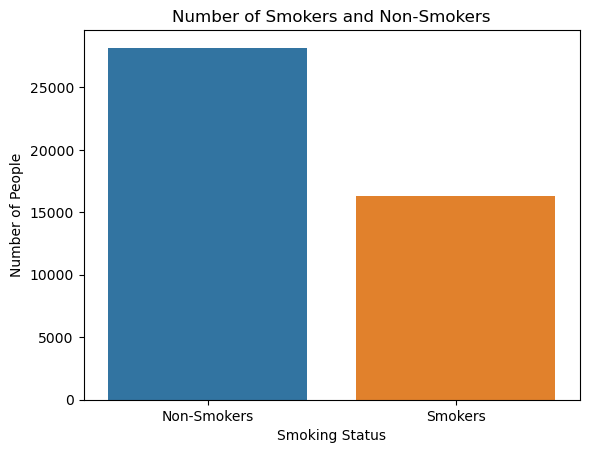

In [19]:
scaled_df['smoking_label'] = scaled_df['smoking'].map({1: 'Smokers', 0: 'Non-Smokers'})
smoking_counts = scaled_df['smoking_label'].value_counts()

sns.barplot(x=smoking_counts.index, y=smoking_counts.values, palette=['#1f77b4', '#ff7f0e'])
plt.xlabel('Smoking Status')
plt.ylabel('Number of People')
plt.title('Number of Smokers and Non-Smokers')
plt.show()

Text(0, 0.5, 'Cholesterol')

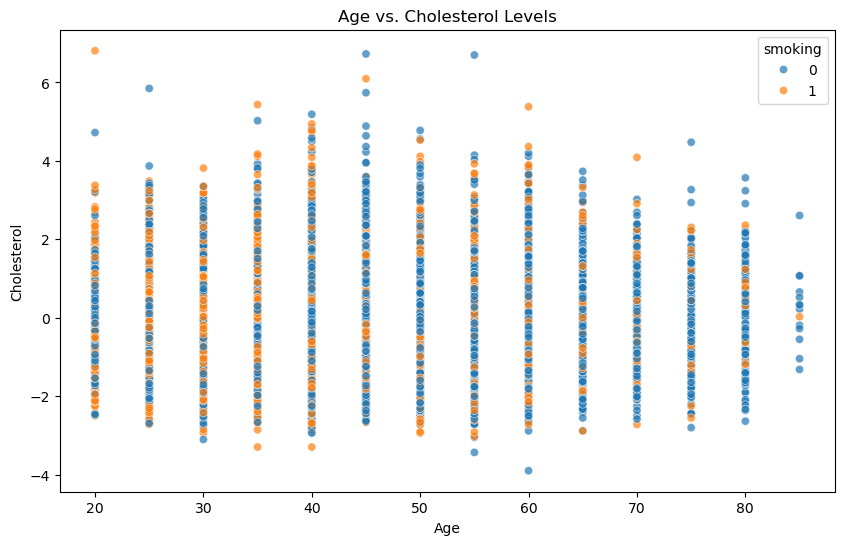

In [20]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='age', y='Cholesterol', data=scaled_df, hue='smoking', alpha=0.7)

plt.title('Age vs. Cholesterol Levels')

plt.xlabel('Age')

plt.ylabel('Cholesterol')

plt.show()

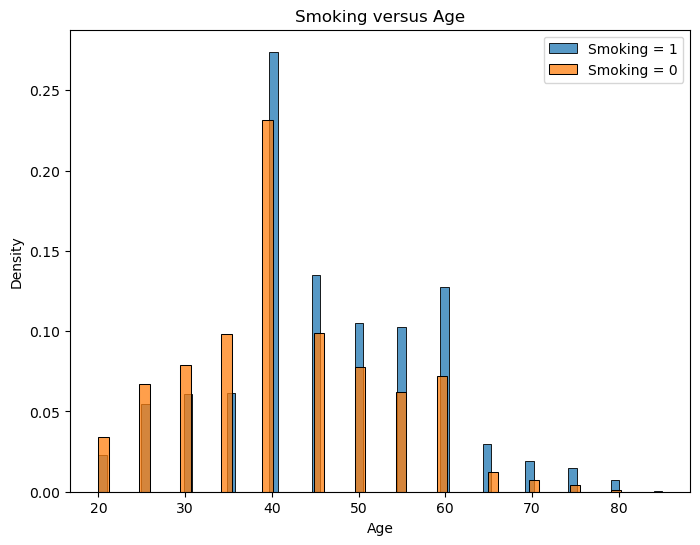

In [21]:
plt.figure(figsize=(8, 6))

sns.histplot(scaled_df[scaled_df['smoking'] == 0]["age"], label='Smoking = 1', stat='density')
sns.histplot(scaled_df[scaled_df['smoking'] == 1]["age"], label='Smoking = 0', stat='density')

plt.title('Smoking versus Age')
plt.xlabel('Age')
plt.ylabel('Density')

plt.legend()

plt.show()

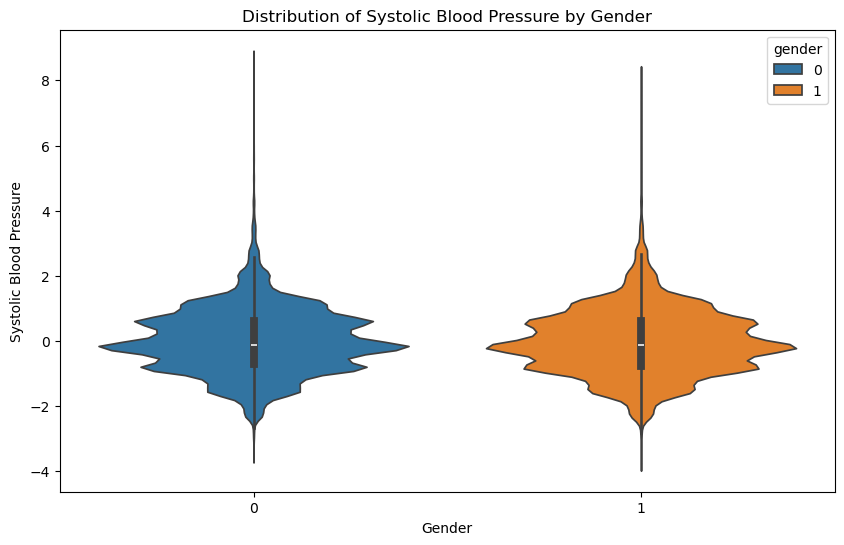

In [22]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='gender', y='systolic', data=scaled_df, hue='gender')
plt.title('Distribution of Systolic Blood Pressure by Gender')
#plt.legend(title='gender', labels=['Men', 'Women'])
plt.xlabel('Gender')
plt.ylabel('Systolic Blood Pressure')
plt.show()

/var/folders/zj/r7680p2d20qfmg5r43960xyr0000gn/T/ipykernel_85503/3894232909.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(scaled_df[scaled_df['smoking'] == 1]['BMI'], label='Smokers', shade=True)
/var/folders/zj/r7680p2d20qfmg5r43960xyr0000gn/T/ipykernel_85503/3894232909.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(scaled_df[scaled_df['smoking'] == 0]['BMI'], label='Non-Smokers', shade=True)


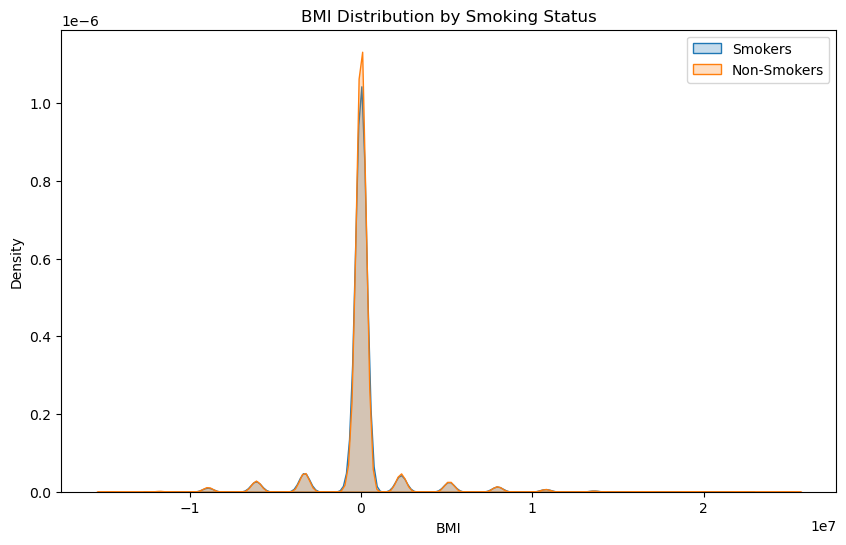

In [23]:
scaled_df['BMI'] = scaled_df['weight(kg)'] / (scaled_df['height(cm)'] / 100) ** 2
 
plt.figure(figsize=(10, 6))
sns.kdeplot(scaled_df[scaled_df['smoking'] == 1]['BMI'], label='Smokers', shade=True)
sns.kdeplot(scaled_df[scaled_df['smoking'] == 0]['BMI'], label='Non-Smokers', shade=True)
plt.title('BMI Distribution by Smoking Status')
plt.xlabel('BMI')
plt.legend()
plt.show()

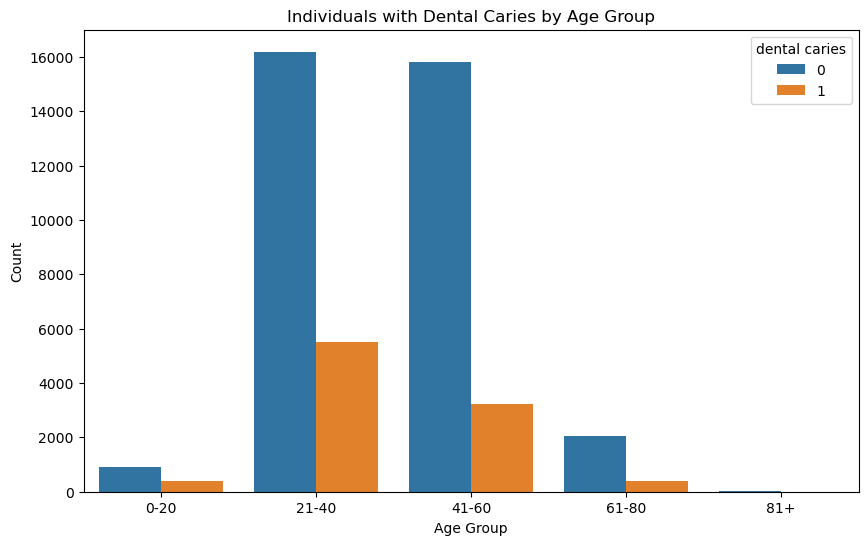

In [24]:
scaled_df['age_group'] = pd.cut(scaled_df['age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81+'])
 
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='dental caries', data=scaled_df)
plt.title('Individuals with Dental Caries by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

In [25]:
# Create a pair plot for numeric columns
sns.pairplot(data=scaled_df, hue="smoking", palette="coolwarm")

Use the first 1000 rows
sb.pairplot(diamonds_data.loc[:999,:], hue="price", palette="coolwarm")

Display the pair plot
plt.show()

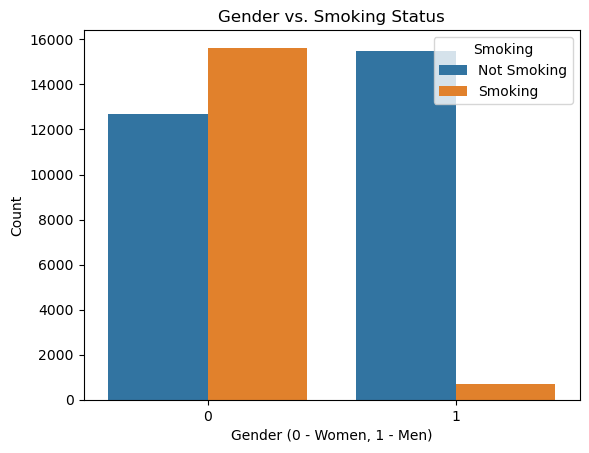

In [26]:
plot = sns.countplot(data=scaled_df, x='gender', hue='smoking')

plt.xlabel('Gender (0 - Women, 1 - Men)')
plt.ylabel('Count')
plt.title('Gender vs. Smoking Status')

plt.legend(title='Smoking', labels=['Not Smoking', 'Smoking'])

plt.show()

In [27]:
scaled_df = scaled_df.drop(['smoking_label', 'age_group'], axis=1)
scaled_df.corr().style.background_gradient(cmap = "GnBu")

,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,gender,age,Urine protein,dental caries,tartar,smoking,BMI
height(cm),1.000000,0.675802,0.379181,0.152023,0.156566,-0.080504,-0.077878,0.081390,0.115091,0.016347,-0.082633,0.155914,-0.210293,-0.058586,0.537594,0.373767,0.055332,0.180964,0.140256,-0.076271,-0.055145,-0.003165,0.013176,0.010485,0.040951,0.002887
weight(kg),0.675802,1.000000,0.823190,0.108523,0.112698,-0.051334,-0.052306,0.265174,0.271206,0.135364,0.024490,0.322729,-0.355047,0.050023,0.489336,0.314423,0.149253,0.355514,0.209552,-0.062962,-0.042708,0.002899,0.005495,0.007039,0.031009,0.309021
waist(cm),0.379181,0.823190,1.000000,0.027719,0.035927,0.022754,0.019071,0.315491,0.291164,0.211716,0.062525,0.360812,-0.371237,0.082891,0.382015,0.225657,0.171146,0.351754,0.242264,-0.043924,-0.010325,0.003239,-0.001880,0.004209,0.020663,0.325156
eyesight(left),0.152023,0.108523,0.027719,1.000000,0.368958,-0.051986,-0.053552,-0.019185,0.004099,-0.044455,-0.008979,0.020204,-0.018174,-0.010456,0.095620,0.074233,-0.006608,0.029124,0.004559,-0.012117,-0.025078,-0.002120,0.008205,0.002123,0.014324,0.014895
eyesight(right),0.156566,0.112698,0.035927,0.368958,1.000000,-0.045718,-0.047573,-0.015705,0.008817,-0.044795,-0.010035,0.021923,-0.022472,-0.009817,0.096446,0.047634,-0.007519,0.032715,0.012126,-0.005619,-0.027142,-0.001926,0.010866,-0.002930,0.006571,0.013046
hearing(left),-0.080504,-0.051334,0.022754,-0.051986,-0.045718,1.000000,0.506452,0.057288,0.010987,0.042681,-0.024572,0.003821,-0.020472,-0.019053,-0.028933,0.002318,0.012373,-0.018183,0.010714,0.007407,0.018017,-0.003170,0.001046,-0.007558,-0.005811,-0.006820
hearing(right),-0.077878,-0.052306,0.019071,-0.053552,-0.047573,0.506452,1.000000,0.051436,0.003951,0.041105,-0.024392,0.001359,-0.020412,-0.017518,-0.030560,0.010027,0.011759,-0.020510,0.006760,-0.005352,0.023187,0.001131,-0.005601,-0.004402,0.001753,-0.008598
systolic,0.081390,0.265174,0.315491,-0.019185,-0.015705,0.057288,0.051436,1.000000,0.761379,0.172170,0.057223,0.197017,-0.085863,0.017641,0.184128,0.071156,0.105824,0.141460,0.165560,-0.018997,0.015042,0.006326,-0.002739,-0.002812,0.008761,0.126915
relaxation,0.115091,0.271206,0.291164,0.004099,0.008817,0.010987,0.003951,0.761379,1.000000,0.148636,0.094770,0.215222,-0.086657,0.051688,0.232803,0.082553,0.104709,0.155841,0.177440,-0.020011,0.001533,0.005657,-0.003609,-0.003286,0.012784,0.121897
fasting blood sugar,0.016347,0.135364,0.211716,-0.044455,-0.044795,0.042681,0.041105,0.172170,0.148636,1.000000,0.010920,0.227697,-0.120727,-0.028718,0.098817,0.039387,0.085869,0.131028,0.179243,-0.002388,0.025334,0.012119,-0.000291,0.002466,-0.000156,0.072591


In [28]:
# The target column is "smoking" because we want our model
# to predict if a person is a smoker or non-smoker based on some physical parameters
scaled_df = scaled_df.drop(['hearing(left)', 'hearing(right)', 'eyesight(left)', 'eyesight(right)', 'Urine protein', 'waist(cm)', 'height(cm)'], axis=1)
scaled_df_y = scaled_df['smoking']
scaled_df_x = scaled_df.drop(['smoking'], axis=1)

In [29]:
# FIRST CLASSIFICATION ALGORITHM: DECISION TREE
# Import the DecisionTreeClassifier class from the sklearn.tree module
from sklearn.tree import DecisionTreeClassifier

# Import the train_test_split function from the sklearn.model_selection module 
# The train_test_split function is used to split a dataset into training and testing subsets
from sklearn.model_selection import train_test_split

In [30]:
# n_features: This variable is assigned the number of features in our dataset. 
# n_classes: This variable is assigned an array containing the unique classes or labels found in our target variable y
n_features, n_classes = scaled_df_x.shape[1], np.unique(scaled_df_y)

n_features, n_classes

(18, array([0, 1]))

In [31]:
# train_test_split is used to split features X and target variable y into training and testing sets
# test_size parameter specifies the proportion of the data allocated for the testing set, which is set to 20% in this case.
# X_train: This variable contains the feature data for the training set.
# X_test: This variable contains the feature data for the testing set.
# y_train: This variable contains the target labels for the training set.
# y_test: This variable contains the target labels for the testing set.
X_train, X_test, y_train, y_test = train_test_split(scaled_df_x, scaled_df_y, test_size=0.2, random_state=42, stratify=scaled_df_y)

# Print the shapes of the training and testing sets
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(35600, 18) (35600,) (8901, 18) (8901,)


In [32]:
# A Decision Tree classifier model is created and assigned to the variable "dt"
# random_state parameter is set to 42 ensures that the model's behavior is consistent and reproducible
#   meaning we will get the same results when we run the code multiple times with the same random_state value
dt = DecisionTreeClassifier(min_samples_leaf=6, min_samples_split=5000, random_state=42)

# Train the Decision Tree classifier model on the training data
dt.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=6, min_samples_split=5000,
                       random_state=42)

In [33]:
# Calculate and print the accuracy of the Decision Tree classifier model on the training set
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))

# Calculate and print the accuracy of the Decision Tree classifier model on the testing set
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))

Accuracy on training set: 0.724
Accuracy on test set: 0.734


In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
# The Decision Tree classifier model (dt) is used to make predictions on the feature data from the testing dataset (X_test)
y_prediction = dt.predict(X_test)

# Calculate the confusion matrix based on the actual target labels (y_test) and the predicted labels (y_prediction)
cm = confusion_matrix(y_test, y_prediction)

print(cm)

[[4192 1442]
 [ 930 2337]]


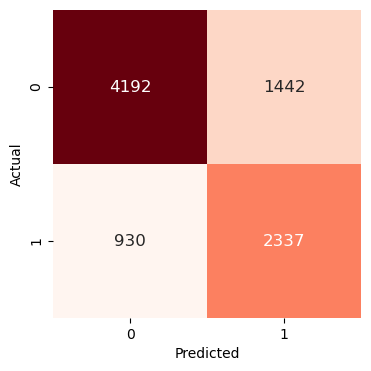

In [36]:
# Creates a Pandas DataFrame df_cm to store the values of the confusion matrix
# data: This is the confusion matrix data calculated in the previous step
# columns=np.unique(y_test): This sets the column labels of the DataFrame
# index=np.unique(y_test): This sets the row labels of the DataFrame
df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))

# Set the names for the DataFrame's index (rows) and columns
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

# Create a new figure for the heatmap 
plt.figure(figsize = (4,4))

# Generate the heatmap visualization
# df_cm: This is the Pandas DataFrame containing the confusion matrix data
# annot=True: This parameter specifies that  cell values in the heatmap should be annotated (displayed) on the heatmap cells
# annot_kws={"size": 12}: This parameter sets the font size for the annotations to 12
# cbar=False: This parameter indicates that a color bar (legend) should not be displayed on the heatmap.
# square=True: This parameter ensures that the heatmap cells are square
# fmt="d": This parameter specifies that the cell values should be formatted as integers
# cmap="Reds": This parameter sets the color map to "Reds".
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cbar=False, square=True, fmt="d", cmap="Reds")

plt.show()

In [37]:
# Import the tree module from the scikit-learn library (sklearn)
from sklearn import tree

import matplotlib.pyplot as plt

Feature names:  Index(['weight(kg)', 'systolic', 'relaxation', 'fasting blood sugar',
       'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'gender', 'age',
       'dental caries', 'tartar', 'BMI'],
      dtype='object')
Target names:  [0, 1]


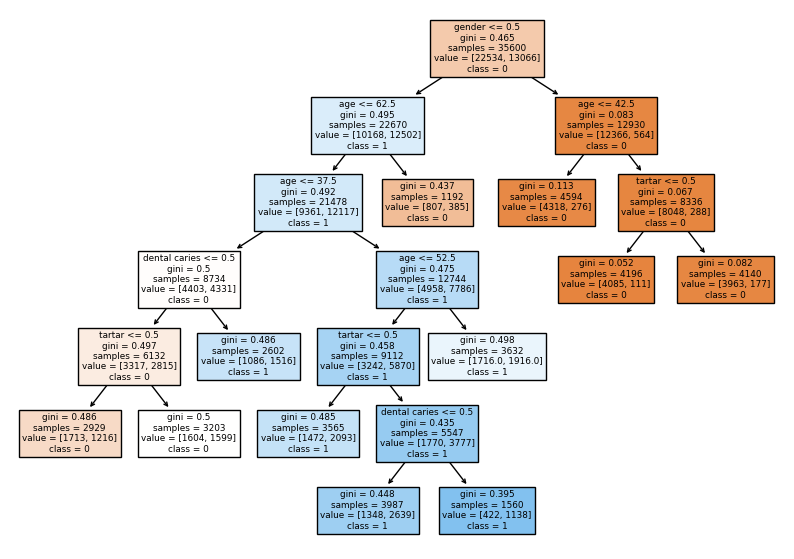

In [38]:
# Create and display a visual representation of a decision tree model using the matplotlib.pyplot library

fig = plt.figure(figsize=(10,7))

# Convert class names to strings
class_names = list(map(str, scaled_df['smoking'].unique()))

tree.plot_tree(dt, feature_names=list(scaled_df_x.columns), class_names=class_names, filled=True)

print("Feature names: ", scaled_df_x.columns);
print("Target names: ", scaled_df['smoking'].unique().tolist());

# Display the created decision tree visualization
plt.show()

In [39]:
# A new Decision Tree classifier model is created and assigned to the variable dt_maxlength
# max_depth=3: The max_depth parameter controls the maximum depth of the decision tree
dt_maxlength = DecisionTreeClassifier(max_depth=3, random_state=42)

# Train the dt_maxlength
dt_maxlength.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [40]:
# Calculate and print the accuracy of the Decision Tree classifier model on the training set
print("Accuracy on training set: {:.3f}".format(dt_maxlength.score(X_train, y_train)))

# Calculate and print the accuracy of the Decision Tree classifier model on the testing set
print("Accuracy on test set: {:.3f}".format(dt_maxlength.score(X_test, y_test)))

Accuracy on training set: 0.712
Accuracy on test set: 0.722


In [41]:
# SECOND CLASSIFICATION ALGORITHM: DECISION TREE

# Import the SVC class from the sklearn.svm module
from sklearn.svm import SVC

# new variable X is created to store the feature variables for your machine learning model
# we drop smoking because it is our target but we also drop some other columns due to computational limits
X = scaled_df.drop(['smoking', 'relaxation', 'fasting blood sugar', 'triglyceride', 'LDL', 'serum creatinine', 'AST', 'dental caries', 'tartar', 'HDL', 'hemoglobin', 'Gtp', 'systolic', 'gender', 'age', ], axis=1) 
X

,weight(kg),Cholesterol,ALT,BMI
0,-0.458845,0.494220,-0.355330,-4.162778e+03
1,-0.458845,-0.137353,-0.355330,-1.789716e+04
2,-0.458845,1.235632,-0.491832,-1.360452e+04
3,0.320889,3.432409,-0.036827,2.317930e+06
4,-0.458845,-0.357031,-0.582833,-4.162778e+03
...,...,...,...,...
44522,-0.068978,-0.411951,1.009684,-2.045156e+03
44523,0.320889,-0.274652,-0.582833,2.538587e+03
44524,0.320889,-1.427960,-0.355330,2.538587e+03
44525,1.880357,-0.494330,1.009684,1.358268e+07


In [42]:
# A new variable y is created to store the target variable (class labels) for your machine learning model
y = scaled_df['smoking']
y

0        0
1        0
2        1
3        0
4        0
        ..
44522    0
44523    1
44524    0
44525    0
44526    1
Name: smoking, Length: 44501, dtype: int64

In [43]:
# n_features: This variable is assigned the number of features in our dataset. 
# n_classes: This variable is assigned an array containing the unique classes or labels found in our target variable y
n_features, n_classes = X.shape[1], np.unique(y)

n_features, n_classes

(4, array([0, 1]))

In [44]:
# Limit the dataset to 20 randomly sampled rows due to computational limits
X_sampled = X.sample(n=20, random_state=42)
y_sampled = y[X_sampled.index]  # Select corresponding y values

# Split the sampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42, stratify=y_sampled)

# Print the shapes of the training and testing sets
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(16, 4) (16,) (4, 4) (4,)


In [45]:
# This chunk will require a few moments to run
# Create a Support Vector Machine (SVM) classifier with a linear kernel using the SVC class
# kernel='linear': Specifies the type of kernel function to be used, in this case, 'linear' indicates a linear kernel
# random_state=42: Sett a random state ensures reproducibility
svm_linear = SVC(kernel='linear', random_state=42)

# Train the Support Vector Machine (SVM) classifier model on the training data
svm_linear.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [46]:
# Calculate and print the accuracy of the SVM classifier model on the training set
print("Accuracy on training set: {:.3f}".format(svm_linear.score(X_train, y_train)))

# Calculate and print the accuracy of the SVM classifier model on the testing set
print("Accuracy on test set: {:.3f}".format(svm_linear.score(X_test, y_test)))

Accuracy on training set: 0.625
Accuracy on test set: 0.250


In [47]:
# This code will require a few moments to run
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid for hyperparameter tuning.
param_grid = {
    'C': [0.1, 1],                 # Regularization parameter. Due to computational limits we removed 10 and 100
    'gamma': ['scale', 'auto'],     # Kernel coefficient
    'kernel': ['linear', 'rbf']     # Kernel type
}

# Create an SVM model
svm = SVC(random_state=42)

# Perform grid search with cross-validation. We use a smaller number, 2 instead of 5, due to computational limits
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=2, scoring='accuracy', verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best cross-validation accuracy:", best_score)

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   6.9s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=  53.8s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   6.9s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=  53.7s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time= 1.2min
[CV] END ....................C=1, gamma=scale, kernel=linear; total time= 1.1min
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=scale,

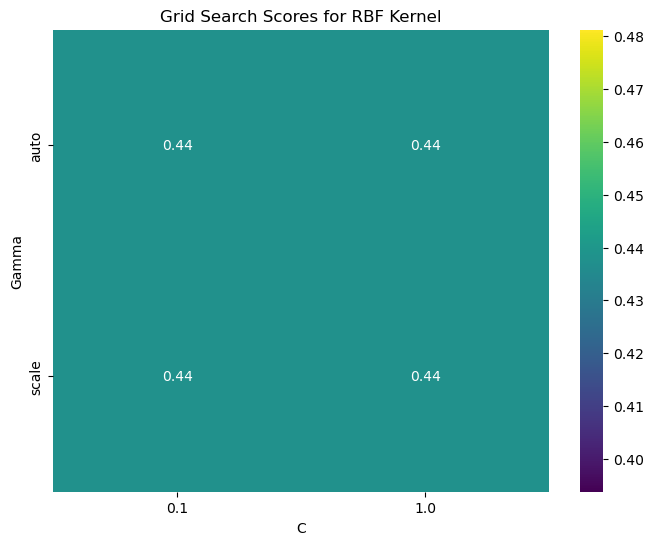

In [48]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Extract the grid search results into a DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Filter the results for the RBF kernel, plotting C vs Gamma
rbf_results = results[results['param_kernel'] == 'rbf']

# Pivot the table to make 'C' as the x-axis and 'gamma' as the y-axis
scores_matrix = rbf_results.pivot(index='param_gamma', columns='param_C', values='mean_test_score')

# Plotting the heatmap for 'C' vs 'gamma' accuracy
plt.figure(figsize=(8, 6))
plt.title("Grid Search Scores for RBF Kernel")
sns.heatmap(scores_matrix, annot=True, cmap='viridis')
plt.xlabel('C')
plt.ylabel('Gamma')
plt.show()

In [49]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

# The SVC classifier model (svm_linear) is used to make predictions on the feature data from the testing dataset (X_test)
y_prediction_linear = svm_linear.predict(X_test)

# Calculate the confusion matrix based on the actual target labels (y_test) and the predicted labels (y_prediction_linear)
cm_linear = confusion_matrix(y_test, y_prediction_linear)

print(cm_linear)

[[0 2]
 [1 1]]


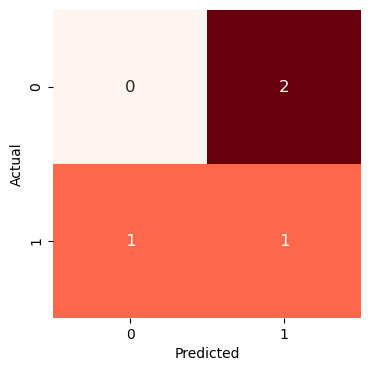

In [51]:
# Creates a Pandas DataFrame df_cm_linear to store the values of the confusion matrix
# data: This is the confusion matrix data calculated in the previous step
# columns=np.unique(y_test): This sets the column labels of the DataFrame
# index=np.unique(y_test): This sets the row labels of the DataFrame
df_cm_linear = pd.DataFrame(cm_linear, columns=np.unique(y_test), index = np.unique(y_test))

# Set the names for the DataFrame's index (rows) and columns
df_cm_linear.index.name = 'Actual'
df_cm_linear.columns.name = 'Predicted'

# Create a new figure for the heatmap 
plt.figure(figsize = (4,4))

# Generate the heatmap visualization
# df_cm_linear: This is the Pandas DataFrame containing the confusion matrix data
# annot=True: This parameter specifies that  cell values in the heatmap should be annotated (displayed) on the heatmap cells
# annot_kws={"size": 12}: This parameter sets the font size for the annotations to 12
# cbar=False: This parameter indicates that a color bar (legend) should not be displayed on the heatmap.
# square=True: This parameter ensures that the heatmap cells are square
# fmt="d": This parameter specifies that the cell values should be formatted as integers
# cmap="Reds": This parameter sets the color map to "Reds".
sns.heatmap(df_cm_linear, annot=True, annot_kws={"size": 12}, cbar=False, square=True, fmt="d", cmap="Reds")

plt.show()